<a href="https://colab.research.google.com/github/SofyaK12/cifar-10_cnn/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


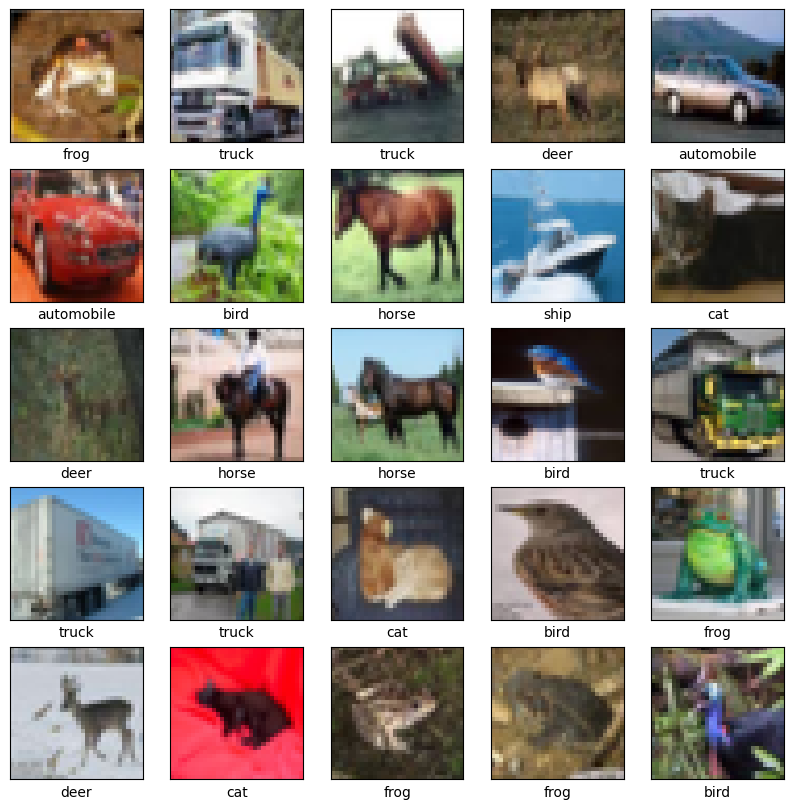

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
# Предположим, данные загружены как (x_train, y_train), (x_test, y_test)
print(f"Обучающая выборка: {train_images.shape[0]} изображений")
print(f"Тестовая выборка: {test_images.shape[0]} изображений")
print(f"Всего: {train_images.shape[0] + test_images.shape[0]} изображений")

Обучающая выборка: 50000 изображений
Тестовая выборка: 10000 изображений
Всего: 60000 изображений


In [5]:
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
# Самая простая рабочая модель
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images, train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 176ms/step - accuracy: 0.2590 - loss: 1.9890 - val_accuracy: 0.4800 - val_loss: 1.4334
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 174ms/step - accuracy: 0.4547 - loss: 1.5031 - val_accuracy: 0.5623 - val_loss: 1.2537
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.5194 - loss: 1.3418 - val_accuracy: 0.6011 - val_loss: 1.1506
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.5506 - loss: 1.2562 - val_accuracy: 0.6095 - val_loss: 1.1153
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 168ms/step - accuracy: 0.5728 - loss: 1.2074 - val_accuracy: 0.6525 - val_loss: 1.0133
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 175ms/step - accuracy: 0.5930 - loss: 1.1496 - val_accuracy: 0.6527 - val_loss: 0.9977
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 167ms/step - accuracy: 0.6081 - loss: 1.1099 - val_accuracy: 0.6694 - val_loss: 0.9662
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.6227 -

313/313 - 4s - 14ms/step - accuracy: 0.7538 - loss: 0.7287


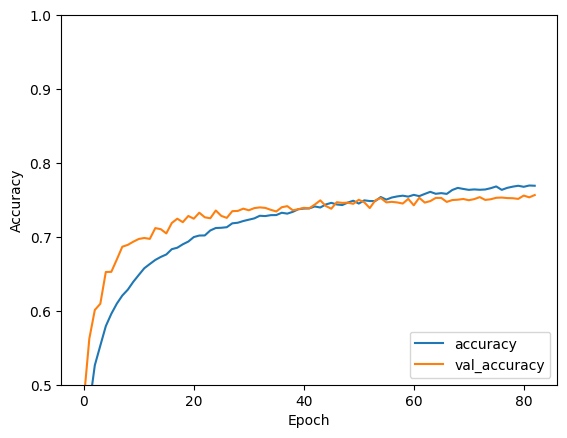

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
print(test_acc)

0.7537999749183655


In [10]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [12]:
predictions[0]

array([0.08718196, 0.08714193, 0.08794406, 0.19993003, 0.08714361,
       0.10164849, 0.08717418, 0.08716545, 0.0874142 , 0.08725612],
      dtype=float32)

In [14]:
import numpy as np
np.argmax(predictions[0])

np.int64(3)

In [15]:
test_labels[0]

array([3], dtype=uint8)

In [16]:
import numpy as np
def plot_image(i, predictions_array, true_label, img, class_names):
    # Извлекаем i-й элемент
    img = img[i]
    true_label = true_label[i]  # Получаем числовой индекс класса
    predictions_array = predictions_array[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    # Добавляем проверку индексов
    if true_label >= len(class_names) or predicted_label >= len(class_names):
        plt.xlabel("Ошибка: неверный индекс класса", color='red')
    else:
        plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})",
                 color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_labels, images, class_names):
    """
    Визуализация одного изображения с предсказанием
    """
    # Получаем конкретные значения для i-го элемента
    img = images[i]
    predictions_array_i = predictions_array[i]
    true_label = true_labels[i]

    # Если true_label массив shape (1,), извлекаем значение
    if isinstance(true_label, np.ndarray) and true_label.size == 1:
        true_label = true_label[0]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array_i)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array_i),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_labels):
    """
    Визуализация вероятностей предсказания
    """
    # Получаем конкретные значения для i-го элемента
    predictions_array_i = predictions_array[i]
    true_label = true_labels[i]

    # Если true_label массив shape (1,), извлекаем значение
    if isinstance(true_label, np.ndarray) and true_label.size == 1:
        true_label = true_label[0]

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array_i, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array_i)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


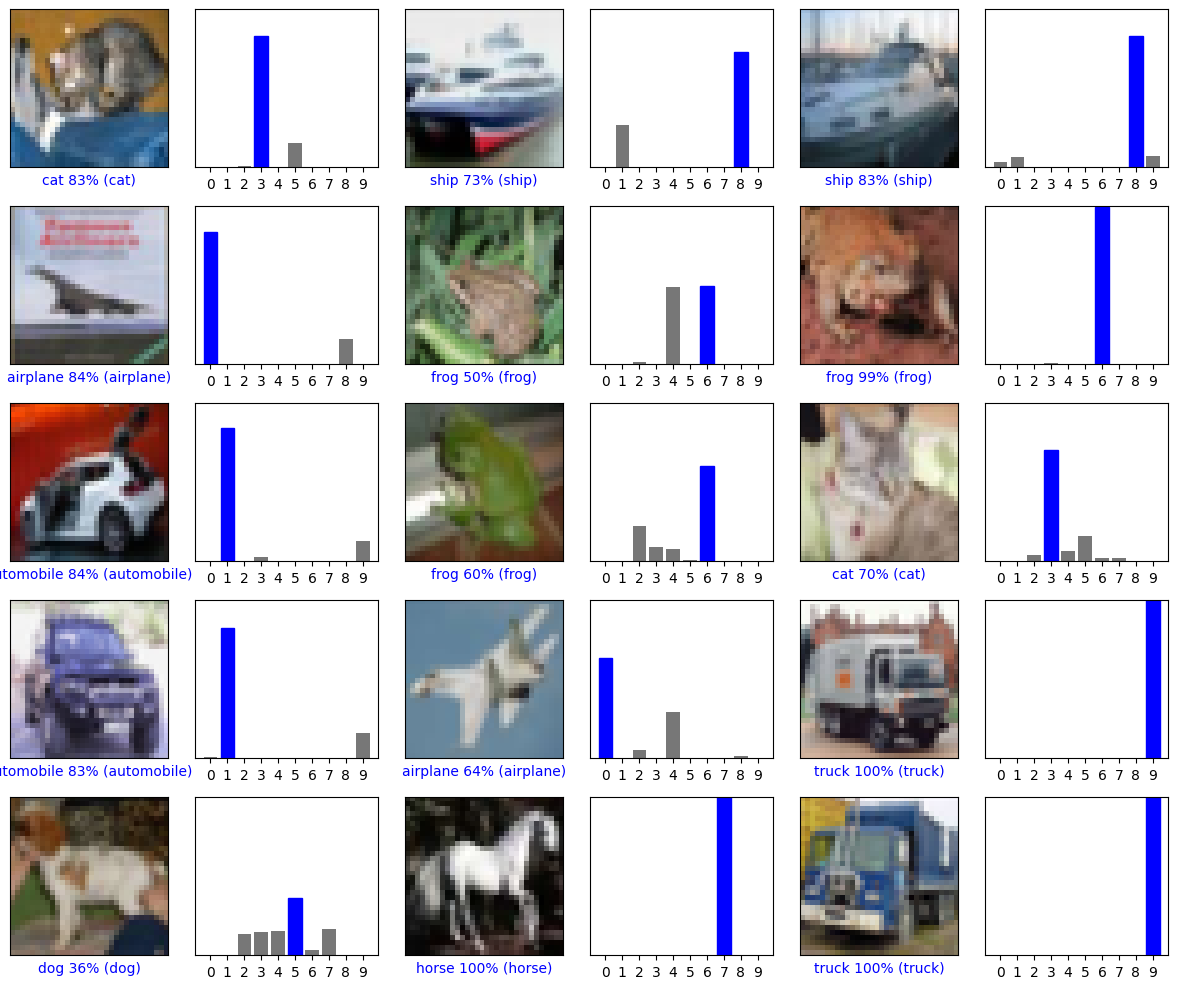

In [20]:
# Получаем предсказания
predictions = model.predict(test_images)

# Названия классов CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Визуализируем несколько изображений
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images, class_names)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

plt.tight_layout()
plt.show()